<a href="https://colab.research.google.com/github/gustiyaniz/Project-Customer-Behavior-Analysis-WIth-Python/blob/main/Project_Customer_Behaviour_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Description: Exploratory Data Analysis of Customer Behavior based on Transactional Data**

# Introduction
In this project, we aim to perform exploratory data analysis (EDA) to gain insights into customer behavior based on transactional data. The dataset consists of store-level data for 10 stores over the last 3 months, with information on brands, categories, quantities, and values of transactions.

# Objective
The goal of this project is to analyze customer preferences, purchasing patterns, and overall behavior using the provided transactional data. By conducting EDA, we aim to derive valuable insights that can inform business strategies and decision-making processes.

# Methods
We start by loading the dataset into Google Colab and performing basic data exploration. We preprocess the data by checking for missing values. Next, we visualize the distribution of transaction values and quantities for each month to understand the variation over time. We also explore monthly trends in total transaction values and identify the top product groups for each month.

# Data Information

## Dataset Description
The dataset provided for this analysis contains store-level transactional data for 10 stores over the last 3 months. It includes information on brands, categories, quantities, and values of transactions.

## Files Provided
- **Hackathon_Ideal_Data.csv**: Contains brand level data for 10 stores for the last 3 months. This is referred to as the ideal data.
- **Hackathon_Working_Data.csv**: Contains data for selected stores which are missing and/or incomplete.
- **Hackathon_Mapping_File.csv**: Provides column names mapping for better understanding of the dataset.
- **Hackathon_Validation_Data.csv**: Contains data for stores and product groups for which we have to predict the Total_VALUE.

## Columns
1. **MONTH**: Month of the transaction (values: M1, M2, M3).
2. **STORECODE**: Code or identifier for each store.
3. **QTY**: Quantity of products sold.
4. **VALUE**: Value of the sales.
5. **GRP**: Product group to which the item belongs.
6. **SGRP**: More specific subgroup within the product group.
7. **SSGRP**: Further refinement of the product classification.
8. **CMP**: Company or brand associated with the product.
9. **MBRD**: Main brand associated with the product.
10. **BRD**: Another brand-related column.

## Data Format
The data is provided in CSV format, which can be easily read using the Pandas library in Python.

# Data Preprocessing
Before conducting the analysis, we may need to clean the data by handling missing values, converting data types, and addressing outliers if present.

## Loading Data
We'll start by loading the dataset from GitHub. This allows us to access the data directly from the repository.

In [12]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data from GitHub
url_ideal = 'https://raw.githubusercontent.com/gustiyaniz/Project-Customer-Behavior-Analysis-WIth-Python/main/Data/Hackathon_Ideal_Data.csv'
data_ideal = pd.read_csv(url_ideal)

url_working = 'https://raw.githubusercontent.com/gustiyaniz/Project-Customer-Behavior-Analysis-WIth-Python/main/Data/Hackathon_Working_Data.csv'
data_working = pd.read_csv(url_working)

In [13]:
data_ideal

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS
...,...,...,...,...,...,...,...,...,...,...
14255,M3,P10,0,0,SUGAR SUBSTITUTE (11/05),POWDER (SUGAR SUBST),POWDER (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14256,M3,P8,1,62,SUGAR SUBSTITUTE (11/05),PELLETS (SUGAR SUBST),PELLETS (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14257,M1,P6,0,0,SUGAR SUBSTITUTE (11/05),PELLETS (SUGAR SUBST),PELLETS (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14258,M1,P10,0,0,SUGAR SUBSTITUTE (11/05),POWDER (SUGAR SUBST),POWDER (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD


In [3]:
data_ideal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MONTH      14260 non-null  object
 1   STORECODE  14260 non-null  object
 2   QTY        14260 non-null  int64 
 3   VALUE      14260 non-null  int64 
 4   GRP        14260 non-null  object
 5   SGRP       14260 non-null  object
 6   SSGRP      14260 non-null  object
 7   CMP        14260 non-null  object
 8   MBRD       14260 non-null  object
 9   BRD        14260 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


In [14]:
data_working

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN


In [15]:
data_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


## Summary Statistics

In [16]:
data_working.describe()

,DAY,BILL_AMT,QTY,VALUE,PRICE
count,26985.000000,26985.000000,26985.000000,26985.000000,26985.000000
mean,15.167019,278.754206,4.105021,67.808551,52.812982
std,8.956057,541.398504,95.666947,118.005978,84.987730
min,1.000000,0.000000,0.500000,0.000000,0.000000
25%,7.000000,40.000000,1.000000,10.000000,10.000000
50%,14.000000,111.000000,1.000000,30.000000,22.000000
75%,23.000000,280.000000,2.000000,80.000000,64.000000
max,31.000000,7292.000000,12000.000000,3150.000000,3150.000000


# Data Analysis

## Distribution Of Numeric Variables

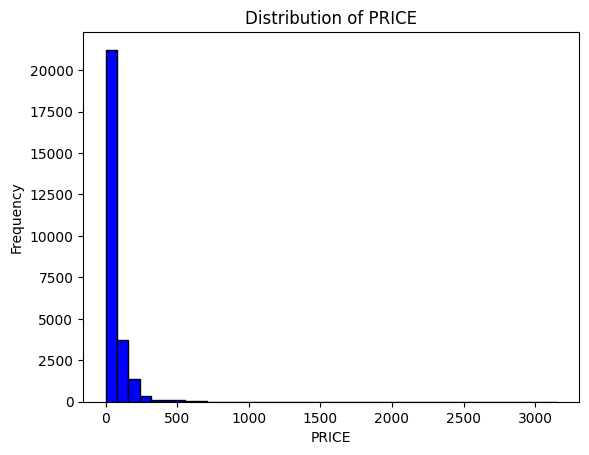

In [ ]:
# Univariate analysis
numeric_column = 'PRICE'
plt.hist(data_working[numeric_column].dropna(), bins=40, color='blue', edgecolor='black')
plt.title(f'Distribution of {numeric_column}')
plt.xlabel(numeric_column)
plt.ylabel('Frequency')
plt.show()

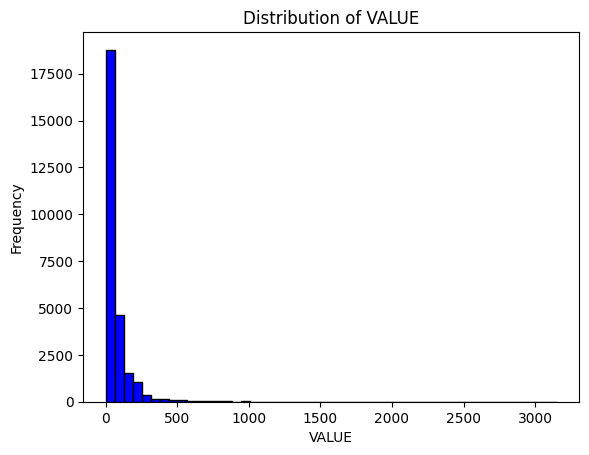

In [ ]:
# Univariate analysis
numeric_column = 'VALUE'
plt.hist(data_working[numeric_column].dropna(), bins=50, color='blue', edgecolor='black')
plt.title(f'Distribution of {numeric_column}')
plt.xlabel(numeric_column)
plt.ylabel('Frequency')
plt.show()

## Bivariate Analysis

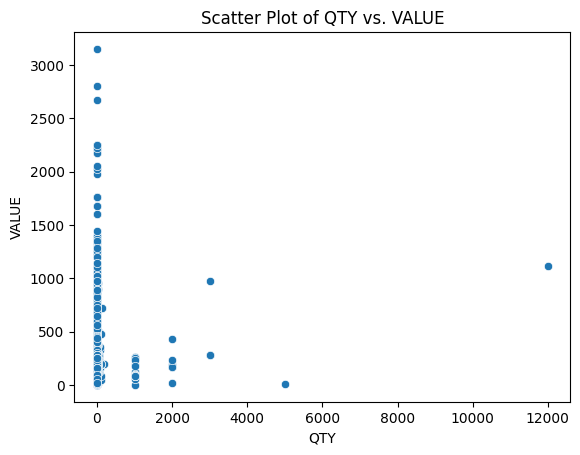

In [ ]:
# Scatter Plot of QTY vs. VALUE
sns.scatterplot(x='QTY', y='VALUE', data=data_working.dropna(subset=['QTY', 'VALUE']))
plt.title('Scatter Plot of QTY vs. VALUE')
plt.show()

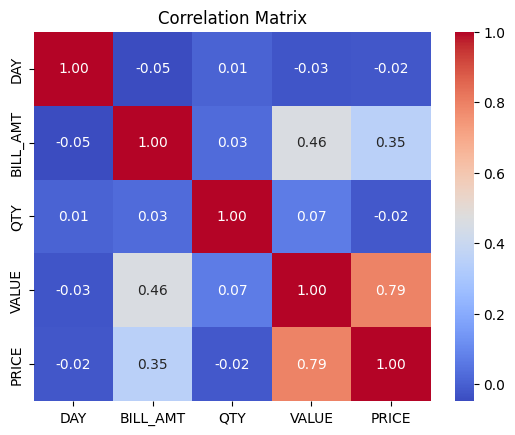

In [ ]:
# Correlation Matrix for numeric columns only
numeric_columns = data_working.select_dtypes(include='number').columns
correlation_matrix = data_working[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Explore Customer Preferences

In [ ]:
# Analyze popular product groups
top_product_groups = data_working['GRP'].value_counts().head(10)
print("Top 10 popular product groups:")
print(top_product_groups)

Top 10 popular product groups:
BISCUITS - CORE & NON CORE       6677
SALTY SNACKS (2/97)              1721
CHOCOLATE                        1408
SPICES (03/04)                   1347
VERMICELLI & NOODLE              1330
WASHING POWDERS/LIQUIDS          1208
PACKAGED TEA                      983
TOILET SOAPS (04/00)              933
REFINED EDIBLE OILS-ALL PACKS     851
CLEANERS - UTENSIL                666
Name: GRP, dtype: int64


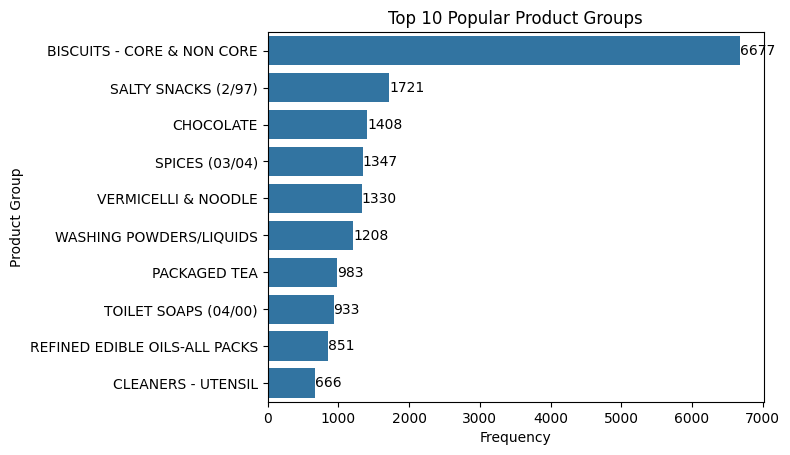

In [ ]:
# Visualize top product groups
ax = sns.barplot(x=top_product_groups.values, y=top_product_groups.index, orient='h')

# Add labels at the end of each bar
for i, v in enumerate(top_product_groups.values):
    ax.text(v + 0.2, i, str(v), ha='left', va='center')

plt.title('Top 10 Popular Product Groups')
plt.xlabel('Frequency')
plt.ylabel('Product Group')
plt.show()

In [ ]:
# Analyze popular brands
top_brands = data_working['MBRD'].value_counts().head(10)
print("Top 10 popular brands:")
print(top_brands)

Top 10 popular brands:
MARIE GOLD            977
MAGGI                 812
AMUL                  779
EVEREST               712
GOOD DAY              687
PARLE-G               603
LAYS                  595
CADBURY DAIRY MILK    583
WHEEL                 536
MONACO                476
Name: MBRD, dtype: int64


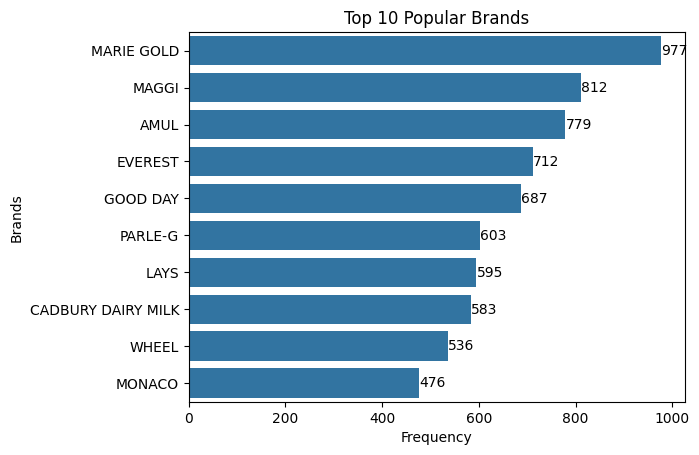

In [ ]:
# Visualize Top Brands
ax = sns.barplot(x=top_brands.values, y=top_brands.index, orient='h')

# Add labels at the end of each bar
for i, v in enumerate(top_brands.values):
    ax.text(v + 0.2, i, str(v), ha='left', va='center')

plt.title('Top 10 Popular Brands')
plt.xlabel('Frequency')
plt.ylabel('Brands')
plt.show()


Total sales by store:
STORECODE
N7     273787.15
N9     250917.03
N5     238057.00
N2     221355.00
N4     206874.99
N1     144206.93
N10    142433.00
N3     125528.79
N8     116466.86
N6     110187.00
Name: VALUE, dtype: float64


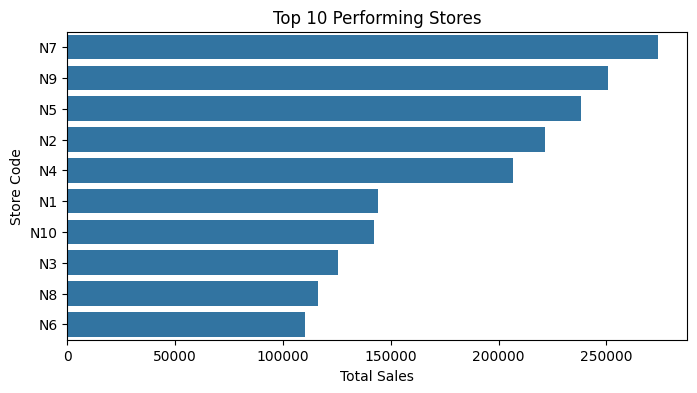

In [18]:
# Analyze total sales by store
total_sales_by_store = data_working.groupby('STORECODE')['VALUE'].sum().sort_values(ascending=False)
print("\nTotal sales by store:")
print(total_sales_by_store)

# Visualize top performing stores
plt.figure(figsize=(8, 4))
top_stores = total_sales_by_store.head(10)
sns.barplot(x=top_stores.values, y=top_stores.index, orient='h')
plt.title('Top 10 Performing Stores')
plt.xlabel('Total Sales')
plt.ylabel('Store Code')
plt.show()

## Analyze Purchasing Patterns


Total sales by product category:
GRP
REFINED EDIBLE OILS-ALL PACKS    185705.25
BISCUITS - CORE & NON CORE       163570.82
PACKAGED TEA                     159665.00
WASHING POWDERS/LIQUIDS          101851.78
PACKAGED PURE GHEE                88638.86
                                   ...    
AFTER SHAVE LOTIONS                 355.00
CONFECTIONERY - COUGH LOZENGE       348.40
CONFECTIONERY - LOLLIPOP/FMR        340.00
CONDOMS                             201.00
ANTISEPTIC CREAMS                    54.00
Name: VALUE, Length: 80, dtype: float64


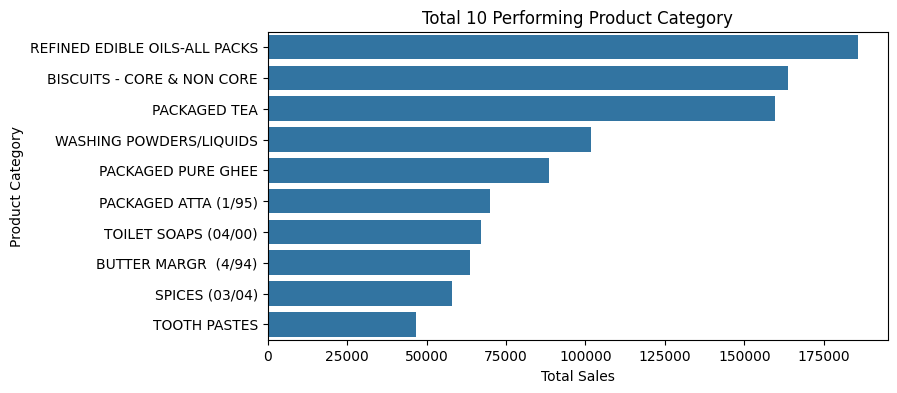

In [ ]:
total_sales_by_category = data_working.groupby('GRP')['VALUE'].sum().sort_values(ascending=False)
print("\nTotal sales by product category:")
print(total_sales_by_category)

# Visualize total sales by product category
plt.figure(figsize=(8, 4))
top_product = total_sales_by_category.head(10)
sns.barplot(x=top_product.values, y=top_product.index, orient='h')
plt.title('Total 10 Performing Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()


Total sales by month:
MONTH
M1    552545.32
M2    667850.67
M3    609417.76
Name: VALUE, dtype: float64


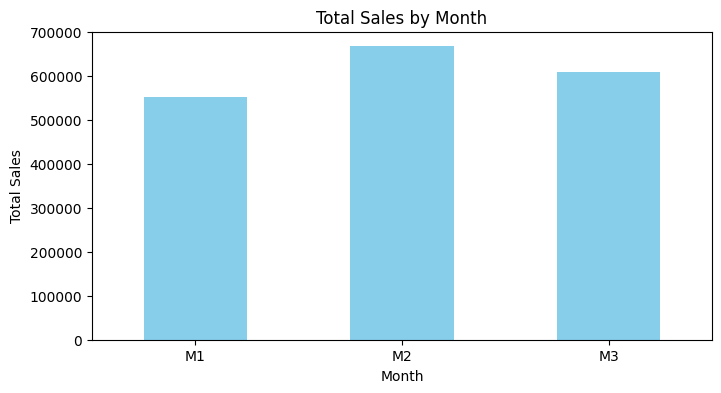

In [ ]:
# Analyze total sales by month
total_sales_by_month = data_working.groupby('MONTH')['VALUE'].sum()
print("\nTotal sales by month:")
print(total_sales_by_month)

# Visualize total sales by month
plt.figure(figsize=(8, 4))
total_sales_by_month.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

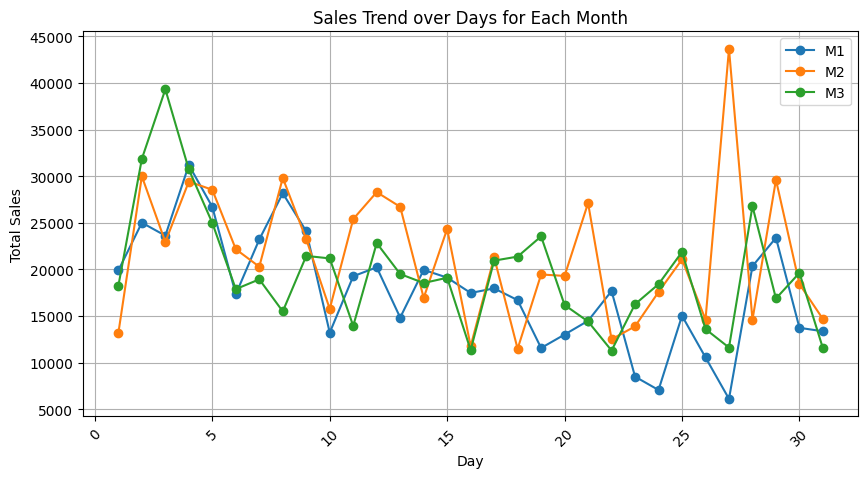

In [19]:
# Filter data for each month
data_working_m1 = data_working[data_working['MONTH'] == 'M1']
data_working_m2 = data_working[data_working['MONTH'] == 'M2']
data_working_m3 = data_working[data_working['MONTH'] == 'M3']

# Calculate total sales by day for each month
total_sales_by_day_m1 = data_working_m1.groupby('DAY')['VALUE'].sum()
total_sales_by_day_m2 = data_working_m2.groupby('DAY')['VALUE'].sum()
total_sales_by_day_m3 = data_working_m3.groupby('DAY')['VALUE'].sum()

# Visualize total sales by day for each month
plt.figure(figsize=(10, 5))
plt.plot(total_sales_by_day_m1.index, total_sales_by_day_m1.values, marker='o', label='M1')
plt.plot(total_sales_by_day_m2.index, total_sales_by_day_m2.values, marker='o', label='M2')
plt.plot(total_sales_by_day_m3.index, total_sales_by_day_m3.values, marker='o', label='M3')
plt.title('Sales Trend over Days for Each Month')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()